# Homework "Linear algebra. Matrices".

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Task 1:

Given an 2 dimensional object:



```
import numpy as np
import matplotlib.pyplot as plt

A = [
[-100, -100, 1],
[-100, 100, 1],
[100, 100, 1],
[0, 0, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)
x = A[:,0]
y = A[:,1]

plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])
```

Using linear maps:\
● Reduce object x2\
● Turn on 130 degrees\
● Mirror object with respect to y=x\
● Calculate Jacobian determinant\

In [2]:
A = [
[-100, -100, 1],
[-100, 100, 1],
[100, 100, 1],
[0, 0, 1],
[100, -100, 1],
[-100, -100, 1]
]
A = np.array(A)

In [3]:
A.shape

(6, 3)

We can notice that for plotting our object third dimension not required. While input matrix has it.


In [4]:
def plotter(function):
    def wrapper(input_matrix, transform_argument=None):
        if transform_argument is None: transform_matrix = function(input_matrix) 
        else: transform_matrix = function(input_matrix, transform_argument)
        x = transform_matrix[:,0]
        y = transform_matrix[:,1]
        
        plt.plot(x, y)
        plt.ylim([-transform_matrix.max()*2, transform_matrix.max()*2])
        plt.xlim([-transform_matrix.max()*2, transform_matrix.max()*2])

    return wrapper

In [5]:
A = np.array([A[:,0],A[:,1]]).T

In [6]:
# Input object
@plotter
def original_mat(mat):
    return np.array([mat[:,0],mat[:,1]]).T

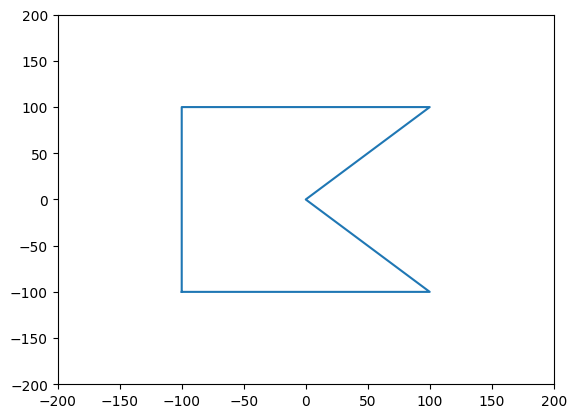

In [7]:
original_mat(A)

In [8]:
# Reduce object x2
@plotter
def resize(mat, resize_value):
    transformed = np.eye(mat.shape[1],mat.shape[1]) * resize_value
    return mat @ transformed

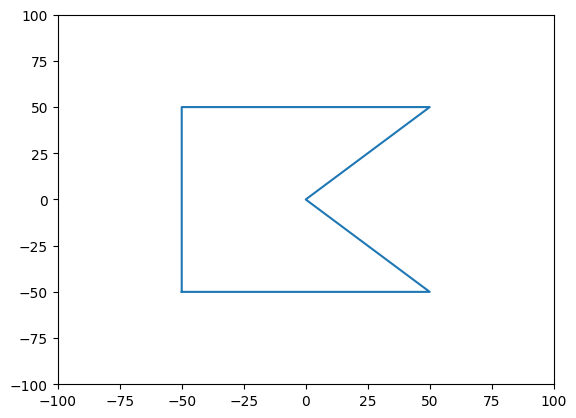

In [9]:
resize(A, 0.5)

In [10]:
# Turn on 130 degrees
@plotter
def turn(mat, degree):
    turn_mat = np.array([[np.cos(degree), -np.sin(degree)], 
                         [np.sin(degree), np.cos(degree)]])
    return mat @ turn_mat

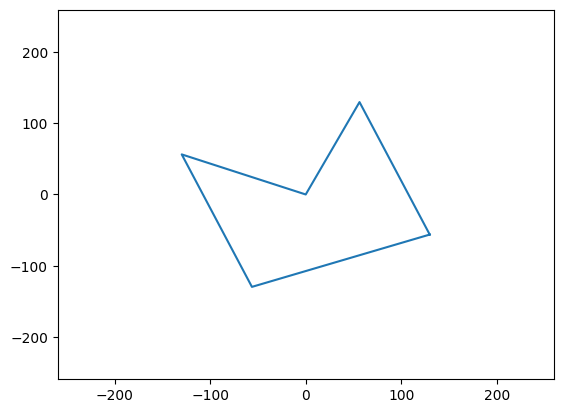

In [11]:
turn(A, 130)

In [14]:
# Mirror object with respect to y=x

@plotter
def mirror(mat):
    transform_matrix = np.array([[0, 1],  
                                 [1, 0]])
    return mat @ transform_matrix

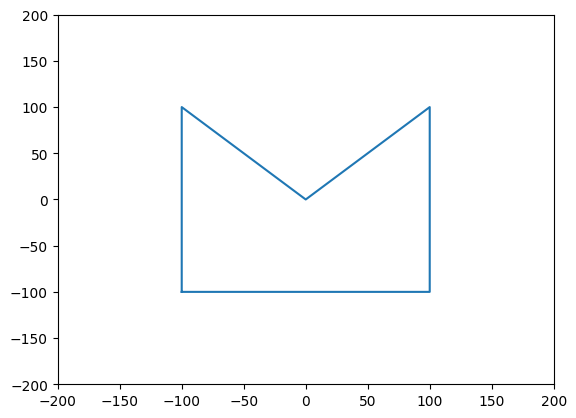

In [15]:
mirror(A)

In [16]:
# Calculate Jacobian determinant of the last matrix

resized = A @ (np.eye(A.shape[1],A.shape[1]) * .5)
resized_turned = resized @ (np.array([[np.cos(130), -np.sin(130)], 
                                      [np.sin(130), np.cos(130)]]))
transformed = resized_turned @ np.array([[0, 1], 
                                         [1, 0]])

trans_mat = (np.eye(A.shape[1],A.shape[1]) * .5) \
          @ (np.array([[np.cos(130), -np.sin(130)],
                       [np.sin(130), np.cos(130)]]))\
          @  np.array([[0, 1], 
                       [1, 0]])
    
assert np.all(transformed == A @ trans_mat)

(-129.73972806414585, 129.73972806414585)

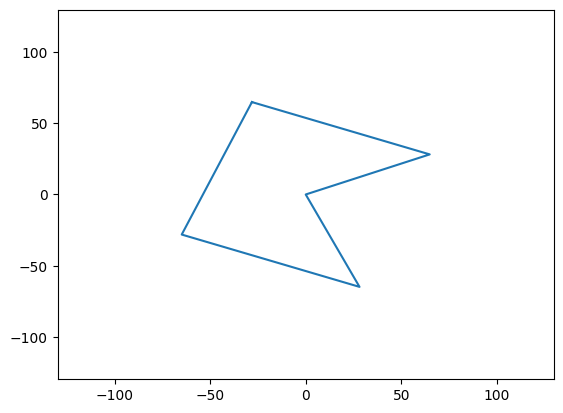

In [17]:
x = transformed[:,0]
y = transformed[:,1]

plt.plot(x, y)
plt.ylim([-transformed.max()*2, transformed.max()*2])
plt.xlim([-transformed.max()*2, transformed.max()*2])

In [18]:
print("Jacobian determinant =", np.linalg.det(trans_mat))

Jacobian determinant = -0.25


# Task №2

Calculate system of equations using matrices

x + z = 2\
-x + y - 2z + w = -2\
4x + z - 2w = 0\
-4x + 4*y + w = 5


In [21]:
# coefficient matrx
A = np.array([[1,0,1,0], 
                    [-1,1,-2,1],
                    [4,0,1,-2],
                    [-4,4,0,1]])
# first vector
b = np.array([2,-2,0,5])

$A x=y \quad \Rightarrow \quad A^{-1} A x=A^{-1} y \quad \Leftrightarrow \quad x=A^{-1} y$

In [22]:
A1 = np.linalg.inv(A)

In [38]:
x = A1 @ b
print(f"x = {x[0]}\ny = {x[1]}\nz = {x[2]}\nw = {x[3]}")

x = 0.0
y = 1.0
z = 2.0
w = 1.0
x = 0.0
y = 1.0
z = 2.0
w = 1.0
